## **Install Ludwig and Ludwig's LLM related dependencies.**

In [1]:
!pip install ludwig
!pip install ludwig[llm]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 12.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 12.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=def34f5093c13dae6bea250b0dc92472897541af7c7cee3db869ccb8ac779b20
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
!pip uninstall -y tensorflow --quiet
!pip install pandas
!pip install git+https://github.com/ludwig-ai/ludwig.git@master --quiet
!pip install "git+https://github.com/ludwig-ai/ludwig.git@master#egg=ludwig[llm]" --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
DEPRECATION: git+https://github.com/ludwig-ai/ludwig.git@master#egg=ludwig[llm] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))

get_ipython().events.register('pre_run_cell', set_css)

def clear_cache():
  if torch.cuda.is_available():
    torch.cuda.empty_cache()

In [4]:
import getpass
import locale; locale.getpreferredencoding = lambda: "UTF-8"
import logging
import os
import torch
import yaml

from ludwig.api import LudwigModel


os.environ["HUGGING_FACE_HUB_TOKEN"] = getpass.getpass("Token:")
assert os.environ["HUGGING_FACE_HUB_TOKEN"]

Token:··········


In [10]:
from google.colab import data_table; data_table.enable_dataframe_formatter()
import numpy as np; np.random.seed(123)
import pandas as pd

df = pd.read_json("/content/Prompt Task.json")


total_rows = len(df)
split_0_count = int(total_rows * 0.9)
split_1_count = int(total_rows * 0.05)
split_2_count = total_rows - split_0_count - split_1_count

# Create an array with split values based on the counts
split_values = np.concatenate([
    np.zeros(split_0_count),
    np.ones(split_1_count),
    np.full(split_2_count, 2)
])

# Shuffle the array to ensure randomness
np.random.shuffle(split_values)

# Add the 'split' column to the DataFrame
df['split'] = split_values
df['split'] = df['split'].astype(int)

# For this webinar, we will just 500 rows of this dataset.
df = df.head(n=500)

In [11]:
df.head()

,instruction,input,output,split
0,What is Computer Science?,"""""",Computer Science,0
1,What happened in World War II?,"""""",WW2,0
2,Tell me everything about Easter and on what da...,"""""",Easter?,0
3,Fix this,onChange={e => { const inputAmount = {moment(e...,onChange={e => {\n const inputAmount = {momen...,0
4,Give me a detailed guide on,the best practices for creating a website usin...,WPguide UX SEO optimization,0


In [22]:
num_self_sufficient = (df['input'] == "\"\"").sum()
num_need_contex = df.shape[0] - num_self_sufficient

# We are only using 100 rows of this dataset for this webinar
print(f"Total number of examples in the dataset: {df.shape[0]}")

print(f"% of examples that are self-sufficient: {round(num_self_sufficient/df.shape[0] * 100, 2)}")
print(f"% of examples that are need additional context: {round(num_need_contex/df.shape[0] * 100, 2)}")

Total number of examples in the dataset: 101
% of examples that are self-sufficient: 71.29
% of examples that are need additional context: 28.71


Average number of tokens in the instruction column: 230
Average number of tokens in the input column: 58
Average number of tokens in the output column: 46



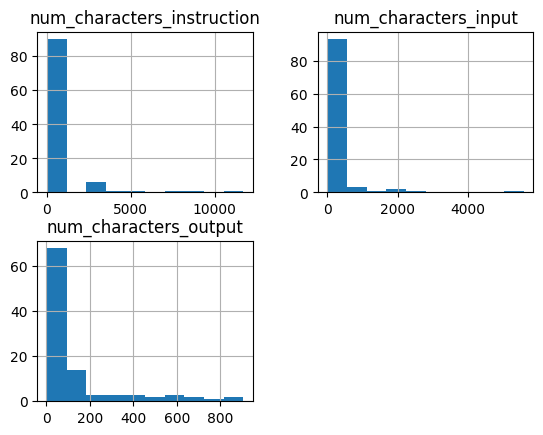

In [23]:
# Calculating the length of each cell in each column
df['num_characters_instruction'] = df['instruction'].apply(lambda x: len(x))
import pandas as pd

# Assuming 'df' is your DataFrame
df['num_characters_input'] = df['input'].apply(lambda x: len(str(x)) if not pd.isna(x) else 0)

df['num_characters_output'] = df['output'].apply(lambda x: len(str(x)) if not pd.isna(x) else 0)

# Show Distribution
df.hist(column=['num_characters_instruction', 'num_characters_input', 'num_characters_output'])

# Calculating the average
average_chars_instruction = df['num_characters_instruction'].mean()
average_chars_input = df['num_characters_input'].mean()
average_chars_output = df['num_characters_output'].mean()

print(f'Average number of tokens in the instruction column: {(average_chars_instruction / 3):.0f}')
print(f'Average number of tokens in the input column: {(average_chars_input / 3):.0f}')
print(f'Average number of tokens in the output column: {(average_chars_output / 3):.0f}', end="\n\n")

In [24]:
type(df["instruction"][4])

str

In [25]:
zero_shot_config = yaml.safe_load(
  """
  model_type: llm
  base_model: meta-llama/Llama-2-7b-hf

  input_features:
    - name: input
      type: text

  output_features:
    - name: output
      type: text

  prompt:
    template: >-
      Below is an instruction that describes a task, paired with an input
      that may provide further context. Write a response that appropriately
      completes the request.

      ### Instruction: {instruction}

      ### Input: {input}

      ### Response:

  generation:
    temperature: 0.1 # Temperature is used to control the randomness of predictions.
    max_new_tokens: 512

  preprocessing:
    split:
      type: fixed

  quantization:
    bits: 4
  """
)

model = LudwigModel(config=zero_shot_config, logging_level=logging.INFO)
results = model.train(dataset=df)

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒════════════════════════╕
INFO:ludwig.utils.print_utils:│ EXPERIMENT DESCRIPTION │
INFO:ludwig.utils.print_utils:╘════════════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/results/api_experiment_run                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────

INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'None': 2910 (without start and stop symbols)
INFO:ludwig.features.text_feature:Setting max length using dataset: 2912 (including start and stop symbols)
INFO:ludwig.features.text_feature:max sequence length is 2912 for feature 'None'
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'output': 263 (without start and stop symbols)
INFO:ludwig.features.text_feature:Setting max length using dataset: 265 (including start and stop symbols)
INFO:ludwig.features.text_feature:max sequence length is 265 for feature 'output'
INFO:ludwig.utils.tokenizers:Loade

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:ludwig.models.llm:Done.
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒══════════╕
INFO:ludwig.utils.print_utils:│ TRAINING │
INFO:ludwig.utils.print_utils:╘══════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.trainers.trainer_llm:
Running evaluation for step: 0, epoch: 0


Evaluation valid:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: develop an outline for a presentation 
### input: about the importance of mental health in the workplace. it should cover current statistics, the impact on productivity, and ways employers can support their employees' mental health.
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: develop an outline for a presentation 
### inp

Evaluation valid:  20%|██        | 1/5 [00:45<03:01, 45.32s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: i want you to act as an english translator, spelling corrector, and improver. i will speak to you in any language and you will detect the language, translate it and answer in the corrected and improved version of my text in english. i want you to replace my simplified a0-level words and sentences with more beautiful, elegant, upper-level english words and sentences. keep the meaning the same, but make them more literary. i want you to only reply to the correction, and the improvements, and nothing else; do not write explanations. my first senten

Evaluation valid:  40%|████      | 2/5 [01:26<02:07, 42.63s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: “their honour precarious, their liberty provisional, lasting only until the discovery of their crime; their position unstable, like that of the poet who one day was feasted at every table, applauded in every theatre in london, and on the next was driven from every lodging, unable to find a pillow upon which to lay his head, turning the mill like samson and saying like him: “the two sexes shall die, each in a place apart!”; excluded even, save on the days of general disaster when the majority rally round the victim as the jews rallied round dreyf

Evaluation valid:  60%|██████    | 3/5 [02:09<01:26, 43.09s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: i want you to act as a sales person to convince clients to sign up for a subscription to my youtube channel.
### input: ""
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: i want you to act as a sales person to convince clients to sign up for a subscription to my youtube channel.
### input: ""
### response: i'm glad you asked.

Evaluation valid:  80%|████████  | 4/5 [02:52<00:42, 42.99s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: came back to karachi from overseas a few weeks ago after a gap of 2 years and i can honestly say i have never seen such level of despair and hopelessness among people who you normally wouldn't even think would be struggling - i'm talking about classmates/colleagues who live in houses owned by family (no rent), with good jobs, cars, kids in private schools, can (or could) afford to eat out at least once a week.

i caught up with a friend/former colleague yesterday who used to be the life of the party back in the day - he seemed so jaded now (desp

Evaluation test :   0%|          | 0/6 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: i want you to act as a personal trainer. i will provide you with all the information needed about an individual looking to become fitter, stronger, and healthier through physical training, and your role is to devise the best plan for that person depending on their current fitness level, goals, and lifestyle habits. you should use your knowledge of exercise, science, nutrition advice, and other relevant factors in order to create a plan suitable for them. my first request “ i need help designing an exercise program for someone who wants to lose w

Evaluation test :  17%|█▋        | 1/6 [00:43<03:39, 43.97s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: i want you to act as a javascript console. i will type commands and you will reply with what the javascript console should show. i want you to only reply with the terminal output inside one unique code block, and nothing else. do not write explanations. do not type commands unless i instruct you to do so. when i need to tell you something in english, i will do so by putting text inside curly brackets {like this}. my first command is console.log(“hello world”);
### input: ""
### response:
INFO:ludwig.models.llm:Decoded generated output for the fi

Evaluation test :  33%|███▎      | 2/6 [01:25<02:49, 42.29s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: can you help me understand the impact of the scientific revolution on modern society?
### input: ""
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: can you help me understand the impact of the scientific revolution on modern society?
### input: ""
### response:
### instruction: can you help me understand the impact of the sci

Evaluation test :  50%|█████     | 3/6 [02:05<02:04, 41.61s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: explain this for me in simple english:
### input: "few-shot (fs) is the term we will use in this work to refer to the setting where the model is given a few
demonstrations of the task at inference time as conditioning [rwc+19], but no weight updates are allowed.
as shown in figure 2.1, for a typical dataset an example has a context and a desired completion (for example
an english sentence and the french translation), and few-shot works by giving k examples of context and
completion, and then one final example of context, with the model expected 

Evaluation test :  67%|██████▋   | 4/6 [02:48<01:24, 42.15s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: fix this query
### input: "select dc.id from byng..demandside_customer dc
where dc.id not exists (select customerid from byng..property_setup where customerid = dc.id)"
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: fix this query
### input: "select dc.id from byng..demandside_customer dc
where dc.id not exists (select custo

Evaluation test :  83%|████████▎ | 5/6 [03:30<00:42, 42.05s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: if you ever go to prison, or have a loved one who goes to prison, there's some information that could be valuable to you.

if you ever go to prison, don't be surprised when it's not what you expected.

from what i've heard, prisons in california, arizona, and texas are very much like the hollywood version. but from my personal experience, and the experience the vast majority of others have shared through their stories, hollywood is wrong about prisons in most other states.

i was locked up in nc from 2016-2019. i'd never been in trouble in my li

Evaluation test : 100%|██████████| 6/6 [04:14<00:00, 42.50s/it]

INFO:ludwig.trainers.trainer_llm:Evaluation took 7m 50.7966s

INFO:ludwig.utils.metrics_printed_table:╒═══════════════════════╤═════════╤══════════════╤════════════╕
│                       │ train   │   validation │       test │
╞═══════════════════════╪═════════╪══════════════╪════════════╡
│ bleu                  │         │       0.0023 │     0.0000 │
├───────────────────────┼─────────┼──────────────┼────────────┤
│ char_error_rate       │         │      10.8716 │     7.9189 │
├───────────────────────┼─────────┼──────────────┼────────────┤
│ loss                  │         │      10.3735 │    10.3735 │
├───────────────────────┼─────────┼──────────────┼────────────┤
│ next_token_perplexity │         │   32000.0664 │ 32000.0645 │
├───────────────────────┼─────────┼──────────────┼────────────┤
│ perplexity            │         │   32000.0039 │ 31999.9727 │
├───────────────────────┼─────────┼──────────────┼────────────┤
│ rouge1_fmeasure       │         │       0.0368 │     0.0782 │
├─

In [ ]:
import torch
model = None  # Dereference the model
torch.cuda.empty_cache()  # Clear the GPU cache

qlora_fine_tuning_config = yaml.safe_load(
"""
model_type: llm
base_model: meta-llama/Llama-2-7b-hf

input_features:
  - name: instruction
    type: text

output_features:
  - name: output
    type: text

prompt:
  template: >-
    Below is an instruction that describes a task, paired with an input
    that provides further context. Write a response that appropriately
    completes the request.

    ### Instruction: {instruction}

    ### Input: {input}

    ### Response:

generation:
  temperature: 0.1
  max_new_tokens: 512

adapter:
  type: lora

quantization:
  bits: 4

preprocessing:
  global_max_sequence_length: 512

trainer:
  type: finetune
  epochs: 5
  batch_size: 1
  eval_batch_size: 1
  gradient_accumulation_steps: 16
  learning_rate: 0.00001
  optimizer:
    type: adam
    params:
      eps: 1.e-8
      betas:
        - 0.9
        - 0.999
      weight_decay: 0
  learning_rate_scheduler:
    warmup_fraction: 0.03
    reduce_on_plateau: 0
"""
)

model = LudwigModel(config=qlora_fine_tuning_config, logging_level=logging.INFO)
results = model.train(dataset=df)

In [28]:
test_examples = pd.DataFrame([
      {
            "instruction": "write an email to my professor to",
            "input": 'the concept of theory and hypothesis in a way that it includes the examples of science and fiction both. I like Sci-Fi but I want to have a proper understanding as well'
      },


])

predictions = model.predict(test_examples)[0]
for input_with_prediction in zip(test_examples['instruction'], test_examples['input'], predictions['output_response']):
  print(f"Instruction: {input_with_prediction[0]}")
  print(f"Input: {input_with_prediction[1]}")
  print(f"Generated Output: {input_with_prediction[2][0]}")
  print("\n\n")

INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.10/dist-packages/ludwig/data/preprocessing.py:1315: UserWarning: column: 'split' is required by the dataset splitter with params: {'type': 'fixed', 'column': 'split'}, but 'split' is not present in the `dataset_df` with columns: Index(['instruction', 'input'], dtype='object'). This is acceptable during serving setting where dataset splitting is irrelevant. You may see this warning if, for example, the model was trained with a configuration that used a stratified split on the target column, but for live predictions, a value for the target column is not to be provided.
  warnings.warn(


Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.33.2"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write an email to my professor to
### input: the concept of theory and hypothesis in a way that it includes the examples of science and fiction both. i like sci-fi but i want to have a proper understanding as well
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write an email to my professor to
### input: the concept of theor

Prediction: 100%|██████████| 1/1 [00:41<00:00, 41.11s/it]


INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
/usr/local/lib/python3.10/dist-packages/ludwig/features/feature_utils.py:102: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(sequence_probabilities))


Instruction: write an email to my professor to
Input: the concept of theory and hypothesis in a way that it includes the examples of science and fiction both. I like Sci-Fi but I want to have a proper understanding as well
Generated Output: 
### 1. the concept of theory and hypothesis in a way that it includes the examples of science and fiction both. i like sci-fi but i want to have a proper understanding as well
### 2. the concept of theory and hypothesis in a way that it includes the examples of science and fiction both. i like sci-fi but i want to have a proper understanding as well
### 3. the concept of theory and hypothesis in a way that it includes the examples of science and fiction both. i like sci-fi but i want to have a proper understanding as well
### 4. the concept of theory and hypothesis in a way that it includes the examples of science and fiction both. i like sci-fi but i want to have a proper understanding as well
### 5. the concept of theory and hypothesis in a way t